In [15]:
import pandas as pd
import numpy as ny
#-import findspark
import json
import nltk
import re
from collections import Counter
import matplotlib.pyplot as plt
#import pronunciation
#findspark.init()
#from pyspark.sql import SparkSession
#needed

In [ ]:
#spark = SparkSession.builder.appName('metadata').getOrCreate()
#df = spark.read.csv("metadata.csv")#, low_memory = False)
#reading in dataset in pyspark to see if it better or worse than pandas
#not needed to run

In [ ]:
#df.columns #to make sure all data column names od not have any hidden spaces and for future reference
#not needed to run

In [ ]:
#df.printSchema() #checking to see how spark prints the data
#not needed to run

In [3]:
dataF = pd.read_csv("metadata.csv", low_memory = False) 
#loading in the file with pandas instead because spark was having a problem withe column names
#needed

In [37]:
dataF.dtypes
#not needed to run

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id           float64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [36]:
cdf2 = dataF[['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'pdf_json_files', 'pmc_json_files',
       'url']]
cdf2 = cdf2.dropna(axis = 0)
cdf2.reset_index(drop=True,inplace=True)
cdf2.shape
cdf2
#not needed to run

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636.0,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967.0,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972.0,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871.0,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888.0,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37403,q23zf9mj,12d2e87b8795c1839f957b97ebc8c1dfd609b2b0,Medline; PMC,History and Future of Nucleic Acid Amplificati...,10.1159/000496749,PMC6514489,31191192.0,green-oa,The introduction of blood donor screening by v...,2019-01-01,"Roth, Willi Kurt",Transfusion Medicine and Hemotherapy,document_parses/pdf_json/12d2e87b8795c1839f957...,document_parses/pmc_json/PMC6514489.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/31191192/;...
37404,nit5v1wg,142699ba5f2be90b66f9e95fa87e9d8029fddc1e,Medline; PMC,Quantitative structure‐activity relationship a...,10.1002/jmv.24736,PMC7167072,27864902.0,no-cc,A number of human coronaviruses (HCoVs) were r...,2017-02-16,"Elfiky, Abdo A.; Mahdy, Samah M.; Elshemey, Wa...",J Med Virol,document_parses/pdf_json/142699ba5f2be90b66f9e...,document_parses/pmc_json/PMC7167072.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/27864902/;...
37405,3g3apbon,d479fdff7406604cebef7b82284ab7a275e17925,Medline; PMC,The Footprint of Genome Architecture in the La...,10.1371/journal.ppat.1003500,PMC3715407,23874204.0,cc-by,The small size of RNA virus genomes (2-to-32 k...,2013-07-18,"Lauber, Chris; Goeman, Jelle J.; Parquet, Mari...",PLoS Pathog,document_parses/pdf_json/d479fdff7406604cebef7...,document_parses/pmc_json/PMC3715407.xml.json,https://doi.org/10.1371/journal.ppat.1003500; ...
37406,5mv15o9t,ca13097c0bc4ca9abed010fa69c56531749da4dd,Medline; PMC,Zanamivir versus trivalent split virus influen...,10.1111/irv.12301,PMC4353320,25557838.0,cc-by,BACKGROUND: Healthcare workers may be exposed ...,2015-01-04,"Coleman, Brenda L; Fadel, Shaza A; Drews, Stev...",Influenza Other Respir Viruses,document_parses/pdf_json/ca13097c0bc4ca9abed01...,document_parses/pmc_json/PMC4353320.xml.json,https://doi.org/10.1111/irv.12301; https://www...


In [46]:
journals = dataF[['journal']]
def getWords(index):
    journal_names = journals.iloc[index]['journal']
    journal_words = re.split('\\W+', journal_names)
    journal_words = list(map(lambda x: x.lower(), journal_words))
    return journal_words


In [47]:
jour = []
for line in range(len(journals)):
    c = getWords(line)
    jour.append(c)
jour

TypeError: expected string or bytes-like object

In [54]:
dataF['journal'].Counter().most_common()

AttributeError: 'Series' object has no attribute 'Counter'

In [50]:
journal = dataF[['journal']]

In [57]:
frequent = Counter(dataF[['journal']])
frequent.most_common()

[('journal', 1)]

In [58]:
df = dataF.dropna(subset=['journal'])
df['journal'].value_counts().max()

1750

In [ ]:
#pmc_jsonF.shape

In [ ]:
#not done coding
i =0 
columnname = 'pmc_json_files'
for i in pmc_jsonF.range(i,len(pmc_jsonF)):
    with open(pmc_jsonF['pmc_json_files'].values[i])

In [60]:
ab = dataF[['abstract']]
ab = ab.dropna()
ab.reset_index(drop=True,inplace=True)
titles = dataF[['title']]
titles = titles.dropna()
titles.reset_index(drop=True,inplace=True)
journals = dataF[['journal']]
journals = journals.dropna()
journals.reset_index(drop=True,inplace=True)
#firstab = ab.iloc[0]['abstract']
#firstabL = re.split('[?!.,:;()]', firstab)
#firstab
#firstabw = re.split('\\W+', firstab)
#firstabw = re.split('[^a-zA-Z]([0-9]+)', firstab)
#result = firstab.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
#result
#firstabword = re.split('[ ]', firstabL)
#firstabword
#for i in ab(i, len(ab))
#ablist = re.split('[?!.]', ab['abstract'])
#ab
titles
journals

,journal
0,BMC Infect Dis
1,Respir Res
2,Respir Res
3,Respir Res
4,Respir Res
...,...
150002,Commun Biol
150003,bioRxiv
150004,Dermatol Ther
150005,Pulmonology


In [ ]:
#wordfreq = []
#for w in firstabw:
   # wordfreq.append(firstabw.count(w))

#print("Pairs\n" + str(list(zip(firstabw, wordfreq))))


In [ ]:
#from collections import Counter
#Counter(newlist).most_common()

In [ ]:
#newlist=[]
#for word in range(len(firstabw)):
    #if len(firstabw[word]) >= 5:
     #   newlist.append(firstabw[word])

In [5]:
def getWords(index):
    Abstract = smallab.iloc[index]['abstract']
    Abstract_words = re.split('\\W+', Abstract)
    Abstract_words = list(map(lambda x: x.lower(), Abstract_words))
    return Abstract_words
#a = getWords(9)
#acleaned = remove(a)
#acleaned

In [94]:
def getWordsJ(index):
    J_list = journals.iloc[index]['journal']
    J_words = re.split('\\W+', J_list)
    J_words = list(map(lambda x: x.lower(), J_words))
    return J_words

In [30]:
def getWordsT(index):
    Ttles = smallt.iloc[index]['title']
    titlew = re.split('\\W+', Ttles)
    titlew = list(map(lambda x: x.lower(), titlew))
    return titlew

In [6]:
def remove(List):
    newlist=[]
    for word in range(len(List)):
        if len(List[word]) >= 5:
            newlist.append(List[word])
    return newlist

In [ ]:
newlist

In [61]:
def removeJ(List):
    newlist=[]
    for word in range(len(List)):
        newlist.append(List[word])
    return newlist

In [7]:
def createCount(List):
    Counter(List).most_common()

In [ ]:
#Counter(acleaned).most_common()

In [8]:
smallab = ab.iloc[0:117124]
cleanedablist = []
for line in range(len(smallab)):
    a = getWords(line)
    acleaned = remove(a)
    cleanedablist.append(acleaned)

In [25]:
len(smallt)

158897

In [31]:
smallt = titles.iloc[0:158897]
cleanedtlist = []
for line in range(len(smallt)):
    t = getWordsT(line)
    tcleaned = remove(t)
    cleanedtlist.append(tcleaned)

In [85]:
cleanedtlist

[['clinical',
  'features',
  'culture',
  'proven',
  'mycoplasma',
  'pneumoniae',
  'infections',
  'abdulaziz',
  'university',
  'hospital',
  'jeddah',
  'saudi',
  'arabia'],
 ['nitric', 'oxide', 'inflammatory', 'mediator', 'disease'],
 ['surfactant', 'protein', 'pulmonary', 'defense'],
 ['endothelin', 'disease'],
 ['expression', 'epithelial', 'cells', 'response', 'pneumovirus', 'infection'],
 ['sequence',
  'requirements',
  'strand',
  'transfer',
  'during',
  'nidovirus',
  'discontinuous',
  'subgenomic',
  'synthesis'],
 ['debate',
  'transfusing',
  'normal',
  'haemoglobin',
  'levels',
  'improve',
  'outcome'],
 ['international',
  'symposium',
  'intensive',
  'emergency',
  'medicine',
  'brussels',
  'belgium',
  'march'],
 ['oxygenase', 'carbon', 'monoxide', 'pulmonary', 'medicine'],
 ['technical', 'description', 'public', 'health', 'surveillance', 'system'],
 ['conservation',
  'polyamine',
  'regulation',
  'translational',
  'frameshifting',
  'yeast',
  'mammal

 smallab = ab.iloc[0:1000]

In [95]:
smallj = journals.iloc[0:150007]
cleanedjlist = []
for line in range(len(smallj)):
    j = getWordsJ(line)
    jcleaned = remove(j)
    cleanedjlist.append(jcleaned)

In [96]:
cleanedjlist

[['infect'],
 ['respir'],
 ['respir'],
 ['respir'],
 ['respir'],
 ['journal'],
 [],
 [],
 ['respir'],
 ['journal', 'american', 'medical', 'informatics', 'association'],
 [],
 ['journal'],
 ['proced', 'online'],
 ['journal'],
 ['transl'],
 ['retrovirology'],
 [],
 ['public', 'health'],
 ['respir'],
 ['genomics'],
 ['zealand', 'health', 'policy'],
 ['microb'],
 ['nucleic', 'acids'],
 ['nucleic', 'acids'],
 ['biomed', 'biotechnol'],
 ['gastroenterol'],
 [],
 ['nucleic', 'acids'],
 ['nucleic', 'acids'],
 ['nucleic', 'acids'],
 ['nucleic', 'acids'],
 ['zealand', 'health', 'policy'],
 ['health', 'geogr'],
 ['global', 'health'],
 [],
 ['nucleic', 'acids'],
 ['virol'],
 ['nucleic', 'acids'],
 ['nucleic', 'acids'],
 ['immunome'],
 [],
 ['reports'],
 ['respir'],
 [],
 ['public', 'health'],
 ['biotechnol'],
 ['reduct'],
 [],
 ['public', 'health'],
 ['ethics'],
 ['based', 'complement', 'alternat'],
 ['respir'],
 ['intern'],
 ['intern'],
 ['intern'],
 ['intern'],
 ['intern'],
 ['intern'],
 ['genomi

In [97]:
Countj = Counter()
for i in cleanedjlist:
    for j in set(i):
        Countj[j] += 1
Countj.most_common()

[('journal', 23898),
 ('infect', 6695),
 ('medicine', 6328),
 ('health', 6089),
 ('surgery', 4501),
 ('virology', 4143),
 ('virol', 3252),
 ('clinical', 3221),
 ('american', 3207),
 ('official', 2980),
 ('international', 2862),
 ('diseases', 2834),
 ('research', 2813),
 ('lancet', 2795),
 ('public', 2653),
 ('society', 2568),
 ('medical', 2545),
 ('infectious', 2171),
 ('microbiol', 2125),
 ('emerg', 2058),
 ('veterinary', 2039),
 ('surgical', 2012),
 ('immunol', 2006),
 ('science', 1830),
 ('association', 1662),
 ('european', 1557),
 ('biorxiv', 1513),
 ('pediatr', 1446),
 ('nature', 1420),
 ('biology', 1376),
 ('microbiology', 1372),
 ('endoscopy', 1352),
 ('infection', 1284),
 ('disease', 1260),
 ('sciences', 1187),
 ('annals', 1154),
 ('environ', 1129),
 ('immunology', 1048),
 ('dermatol', 1047),
 ('virus', 1039),
 ('viruses', 1026),
 ('publication', 1019),
 ('front', 1001),
 ('world', 992),
 ('cancer', 972),
 ('intensive', 972),
 ('molecular', 966),
 ('current', 931),
 ('psychiatr

In [83]:
Count = Counter()
for i in cleanedablist:
    for j in set(i):
        Count[j] += 1
Count.most_common()

[('results', 46299),
 ('these', 38486),
 ('patients', 38234),
 ('study', 37602),
 ('which', 35417),
 ('disease', 35368),
 ('methods', 32585),
 ('virus', 30475),
 ('infection', 29505),
 ('between', 28727),
 ('covid', 28447),
 ('using', 27880),
 ('clinical', 26874),
 ('coronavirus', 25900),
 ('during', 25606),
 ('respiratory', 25242),
 ('other', 24508),
 ('their', 23525),
 ('health', 22885),
 ('after', 22112),
 ('based', 22017),
 ('associated', 21458),
 ('however', 21426),
 ('there', 21412),
 ('viral', 20696),
 ('treatment', 20656),
 ('severe', 20250),
 ('background', 20181),
 ('acute', 20072),
 ('analysis', 20012),
 ('including', 18972),
 ('conclusions', 18935),
 ('cases', 18369),
 ('human', 17421),
 ('pandemic', 17399),
 ('studies', 17372),
 ('compared', 17291),
 ('different', 16977),
 ('first', 16847),
 ('significant', 16545),
 ('potential', 16088),
 ('control', 15672),
 ('syndrome', 15385),
 ('specific', 15185),
 ('found', 15008),
 ('patient', 14782),
 ('important', 14679),
 ('number

In [33]:
Countt = Counter()
for i in cleanedtlist:
    for j in set(i):
        Countt[j] += 1
Countt.most_common()

[('covid', 43182),
 ('coronavirus', 15368),
 ('patients', 11661),
 ('pandemic', 11595),
 ('virus', 11174),
 ('during', 10808),
 ('disease', 9781),
 ('respiratory', 9773),
 ('infection', 9148),
 ('acute', 6651),
 ('health', 6547),
 ('study', 6296),
 ('clinical', 5937),
 ('analysis', 5909),
 ('syndrome', 5496),
 ('novel', 5131),
 ('review', 5087),
 ('human', 4991),
 ('viral', 4935),
 ('severe', 4589),
 ('treatment', 4512),
 ('based', 4122),
 ('using', 4020),
 ('influenza', 3988),
 ('outbreak', 3840),
 ('management', 3785),
 ('infections', 3727),
 ('china', 3724),
 ('protein', 3679),
 ('infectious', 3577),
 ('detection', 3510),
 ('associated', 3497),
 ('after', 3411),
 ('response', 3293),
 ('surgery', 3202),
 ('impact', 3066),
 ('epidemic', 3027),
 ('against', 2996),
 ('pneumonia', 2970),
 ('children', 2967),
 ('laparoscopic', 2901),
 ('viruses', 2812),
 ('diseases', 2774),
 ('cancer', 2765),
 ('model', 2721),
 ('cells', 2647),
 ('systematic', 2586),
 ('system', 2509),
 ('single', 2467),


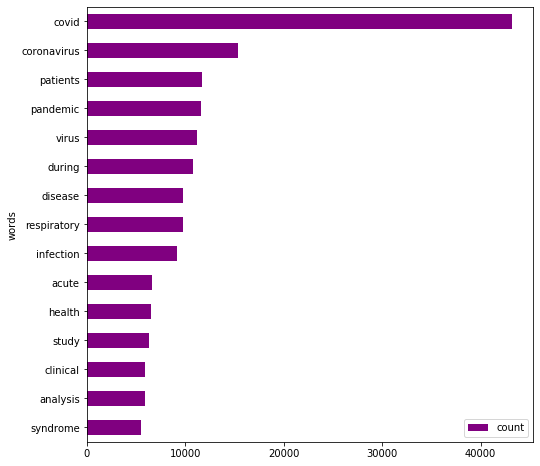

In [34]:
mostcommont = pd.DataFrame(Countt.most_common(15), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommont.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

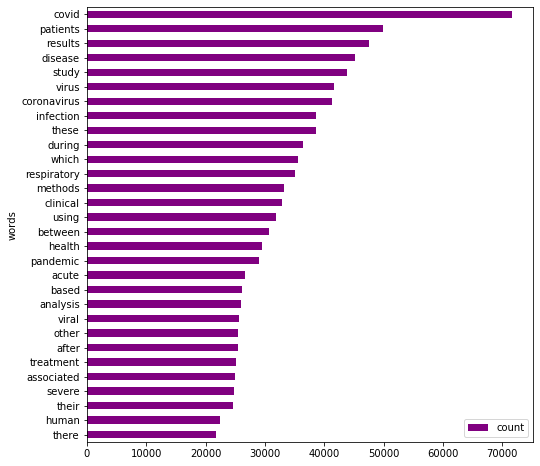

In [35]:
mostcommon = pd.DataFrame(Count.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommon.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()

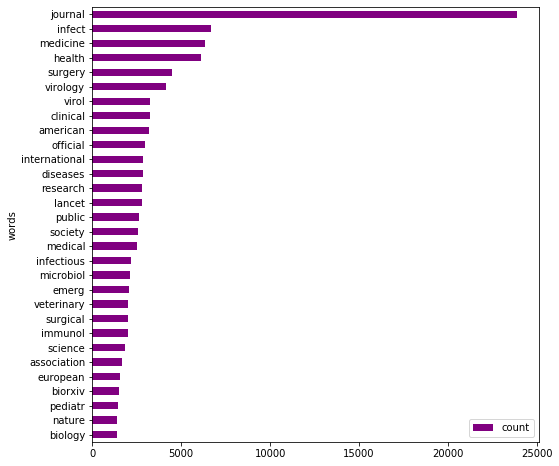

In [100]:
mostcommonj = pd.DataFrame(Countj.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
mostcommonj.sort_values(by='count').plot.barh(x='words',y='count', ax=ax, color="purple")
plt.show()